### Import and store the data in a data frame. (2.5 points)

In [68]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [69]:
df = pd.read_table('airq402.dat', delim_whitespace=True)
cols = ['City1','City2','Average_Fare','Distance','Average_weekly_passengers','market_leading_airline',
        'market_share','Average_fare','Low_price_airline','market_share1','price']
df.columns = cols

In [70]:
df.describe()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share1,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,163.424374,1057.502503,672.527107,60.118519,166.703233,34.515806,143.225285
std,55.371544,643.307320,766.863056,19.374859,62.666775,27.087067,47.241860
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,49.610000
25%,126.025000,554.000000,257.115000,46.510000,124.120000,13.190000,113.825000
50%,161.360000,919.000000,404.780000,59.060000,161.440000,26.120000,137.830000
75%,197.435000,1455.000000,770.265000,73.520000,203.105000,52.950000,168.540000
max,401.230000,2724.000000,8950.760000,100.000000,490.030000,100.000000,387.940000


In [71]:
df.head(3)

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share1,price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86


### Remove the outliers from the data (5 points)

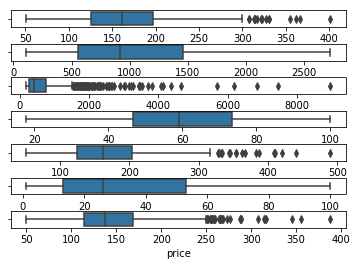

In [72]:
columns = df.describe().columns # This will only take numerical columns
fig, ax = plt.subplots(len(columns),1)
plt.subplots_adjust(hspace = 1)
c=0
for cols in columns: 
    sns.boxplot(df[cols],ax = ax[c])
    plt.show
    c +=1

In [73]:
## Remove outliers
iqr = df.quantile(0.75) - df.quantile(0.25)
ul = df.quantile(0.75) + 1.5  * (iqr)
ll = df.quantile(0.25) - 1.5 * (iqr)

for cols in columns:
    
    df[cols]=df[cols].replace(to_replace=df[cols][df[cols]>ul[cols]],value=ul[cols])
    df[cols]=df[cols].replace(to_replace=df[cols][df[cols]<ll[cols]], value=ll[cols])

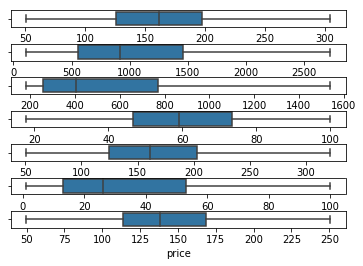

In [74]:
columns = df.describe().columns # This will only take numerical columns
fig, ax = plt.subplots(len(columns),1)
plt.subplots_adjust(hspace = 1)
c=0
for cols in columns: 
    sns.boxplot(df[cols],ax = ax[c])
    plt.show
    c +=1

### Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [75]:
df.corr()['Average_Fare'] # Corr with 'Average Fare'

Average_Fare                 1.000000
Distance                     0.584135
Average_weekly_passengers   -0.196574
market_share                -0.235616
Average_fare                 0.983122
market_share1               -0.463944
price                        0.870588
Name: Average_Fare, dtype: float64

#### None of them have corr less than 0.1 [-0.12 means 0.12 negatively correlated]

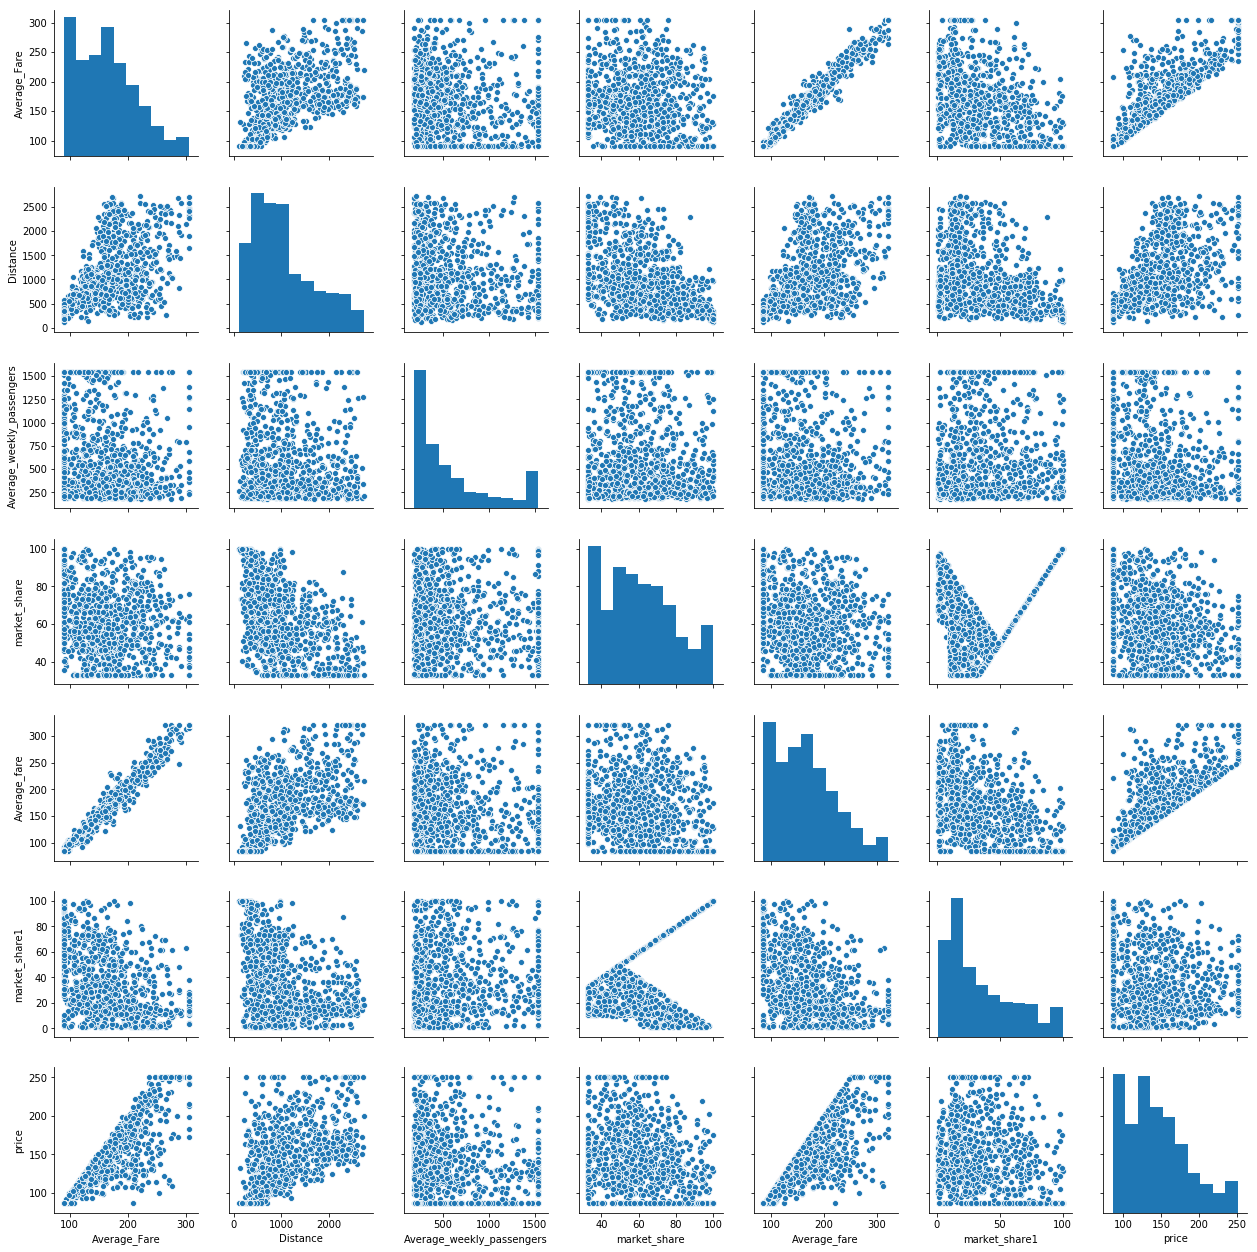

In [19]:
sns.pairplot(df)

#### Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
City1                        999 non-null object
City2                        999 non-null object
Average_Fare                 999 non-null float64
Distance                     999 non-null int64
Average_weekly_passengers    999 non-null float64
market_leading_airline       999 non-null object
market_share                 999 non-null float64
Average_fare                 999 non-null float64
Low_price_airline            999 non-null object
market_share1                999 non-null float64
price                        999 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 85.9+ KB


### Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [77]:
cat_labels = ['City1','City2','market_leading_airline','Low_price_airline']
for label in cat_labels:
    df[label] =  df[label].astype('category').cat.codes


In [78]:
X = df
y = X.pop('Average_fare')

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = X.columns
scaler.fit(X)
X = scaler.transform(X)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [81]:
print ("Shape of X, Train = {0} and Test = {1}".format(X_train.shape,X_test.shape))
print ("Shape of Y, Train = {0} and Test = {1}".format(y_train.shape,y_test.shape))

Shape of X, Train = (799, 10) and Test = (200, 10)
Shape of Y, Train = (799,) and Test = (200,)


### Print the coefficients & intercepts of the linear regression model (5 points)

In [82]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
coff = regr.coef_
data = {'col_name': columns , 'coff': coff}
coff_df = pd.DataFrame(data = data)
print (coff_df)

                    col_name       coff
0                      City1  -0.891333
1                      City2   0.707986
2               Average_Fare  62.569429
3                   Distance  -1.555760
4  Average_weekly_passengers   1.451199
5     market_leading_airline   1.064561
6               market_share  -0.053435
7          Low_price_airline  -0.253272
8              market_share1  -1.858110
9                      price  -4.079376


#### Print the accuracy of the overall model (2.5 points)

In [84]:
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

varinace = r2_score(y_test, y_pred)

In [85]:
print("Root Mean squared error: %.2f" % rmse)
print('Variance score: %.4f' % varinace)

Root Mean squared error: 10.65
Variance score: 0.9699


In [86]:
print ("Accuracy of model on Training set = %.2f%%" %(regr.score(X_train,y_train)*100))
print ("Accuracy of model on Test set = %.2f%%" %(regr.score(X_test,y_test)*100))

Accuracy of model on Training set = 97.03%
Accuracy of model on Test set = 96.99%
